In [1]:
#linear reggresion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/Users/vishaal/Desktop/important papers/train.csv",header=None)
data.head()

RollNo  \
OverallQual GrLivArea GarageCars GarageArea TotalBsmtSF 1stFlrSF FullBath TotRmsAbvGrd  YearBuilt   
7           1820      1          240        1026        1133     2        8                  1925   
            1646      1          240        918         918      2        7                  1941   
5           1316      2          484        926         926      1        6                  1929   
10          2402      3          672        3094        2402     2        10                 2008   

                                                                                                Name  \
OverallQual GrLivArea GarageCars GarageArea TotalBsmtSF 1stFlrSF FullBath TotRmsAbvGrd  YearRemodAdd   
7           1820      1          240        1026        1133     2        8                     1950   
            1646      1          240        918         918      2        7                     1950   
5           1316      2          484        926         926      1        6                     2001   
10          2402      3          672        3094        2402     2        10                    2008   

                                                                                             CGPA  
OverallQual GrLivArea GarageCars GarageArea TotalBsmtSF 1stFlrSF FullBath TotRmsAbvGrd  SalePrice  
7           1820      1          240        1026        1133     2        8                184000  
            1646      1          240        918         918      2        7                164000  
5           1316      2          484        926         926      1        6                130000  
10          2402      3          672        3094        2402     2        10               555000

In [3]:
#to check if there is any corrupt data
data.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [4]:
data = data.sample(frac = 1,random_state=69 ) 
#shuffling the dataframe
data.reset_index(drop=True, inplace=True)

In [7]:
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,5,1052,1,288,1052,1052,1,5,1968,1968,138500
1,6,2555,2,672,588,1423,2,11,1922,1994,191000
2,5,1928,0,0,686,948,2,10,1916,1995,160000
3,7,1555,3,660,1373,1555,2,7,2007,2007,174000
4,7,1459,2,527,1459,1459,2,6,2002,2002,192000


In [19]:
X = data[['OverallQual','GrLivArea',
          'GarageCars','GarageArea','TotalBsmtSF',
          '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt',
         'YearRemodAdd']]
    
y = data['SalePrice']

In [20]:
mean_X = np.mean(X)
mean_y = np.mean(y)

In [21]:
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [22]:
y_pred = X.dot(coefficients)

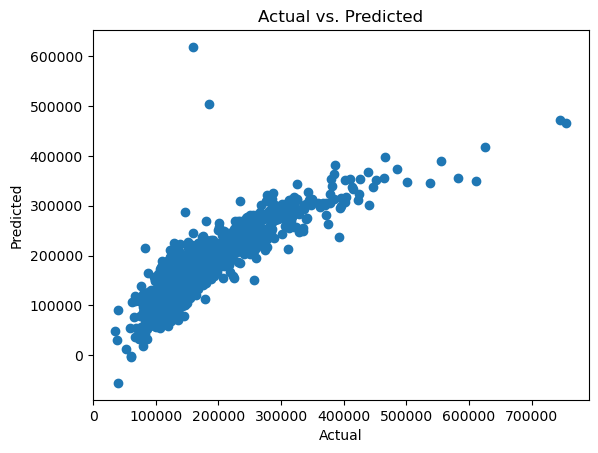

In [23]:
plt.scatter(y, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [24]:
# Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# R-squared (R2) Score
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (numerator / denominator)

# Example usage:
# Assuming y_true and y_pred are your true and predicted target values
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

In [25]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 0.5
Mean Squared Error: 0.375
R-squared Score: 0.9486081370449679
